# DS 2500 Day 7

Jan 27, 2023

### Content:
* Loading Data with `pandas`
    - csv
* Data processing in `pandas`:
    * `.groupby()`
* Plotting with `matplotlib` and `seaborn`:
    * histograms
    * scatter plots
    * line plots


In [1]:
# modules needed today (`seaborn, matplotlib, pandas`)
# windows users: use "pip" in place of "pip3" below
!pip3 install seaborn matplotlib pandas
# remember: restart kernel to access freshly installed modules


# Saving a string to file in python


In [2]:
s_gradebook = """student,Quiz 1,Quiz 2,Quiz 3,Quiz 4
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100"""


In [3]:
# make a new file `gradebook.csv` whose contents are s_gradebook
with open('gradebook.csv', 'w') as f:
    print(s_gradebook, file=f)


In [4]:
# notice: hidden in this string are "newline" characters "\n"
# when printed, they start a newline instead of showing a \n
s_gradebook


'student,Quiz 1,Quiz 2,Quiz 3,Quiz 4\nBob,89,80,93,92\nAlice,100,80,85,92\nCarol,100,80,100,100'

In [5]:
print(s_gradebook)


student,Quiz 1,Quiz 2,Quiz 3,Quiz 4
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100


(We teach this skill here so we can explicitly examine the format of our input csvs)


## Reading CSV (comma seperated value) into Pandas

#### Example

| student | Quiz 1 | Quiz 2 | Quiz 3 | Quiz 4 |
|---------|--------|--------|--------|--------|
| Bob     | 89     | 80     | 93     | 92     |
| Alice   | 100    | 80     | 85     | 92     |
| Carol   | 100    | 80     | 100    | 100    |

The spreadsheet above can be stored as the following string in CSV:
```
'student,Quiz 1,Quiz 2,Quiz 3,Quiz 4\nBob,89,80,93,92\nAlice,100,80,85,92\nCarol,100,80,100,100'
```
 
#### Detail
A CSV is a simple spreadsheet format.  It is a text file where:
- all the values of a row are seperated by commas
    - what a great name for the file type, right?
- all the rows are seperated by newline characters
    - newline `\n` is a special character which marks the end of a line
    - pressing `<enter>` inputs a newline in text editors
    
**note to self** open `gradebook.csv` in a spreadsheet application:


#### Pandas functions:
- `pd.read_csv()`
    - header
    - index_col
    - dtype


In [6]:
import pandas as pd

# note: file must be next to jupyter notebook in same folder
pd.read_csv('gradebook.csv')


,student,Quiz 1,Quiz 2,Quiz 3,Quiz 4
0,Bob,89,80,93,92
1,Alice,100,80,85,92
2,Carol,100,80,100,100


In [7]:
# how to specify index col
pd.read_csv('gradebook.csv', index_col='student')


,Quiz 1,Quiz 2,Quiz 3,Quiz 4
student,,,,
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100


In [8]:
# index_col takes integer arguments too
df = pd.read_csv('gradebook.csv',index_col=0)
df


,Quiz 1,Quiz 2,Quiz 3,Quiz 4
student,,,,
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100


In [9]:
# save gradebook_no_index
s_gradebook_no_index = """Quiz 1,Quiz 2,Quiz 3,Quiz 4
89,80,93,92
100,80,85,92
100,80,100,100"""

with open('gradebook_no_index.csv', 'w') as f:
    print(s_gradebook_no_index, file=f)


In [10]:
# read in data without an index
# both lines below do the same thing (index_col=None is default)
pd.read_csv('gradebook_no_index.csv', index_col=None)
# pd.read_csv('gradebook_no_index.csv')


,Quiz 1,Quiz 2,Quiz 3,Quiz 4
0,89,80,93,92
1,100,80,85,92
2,100,80,100,100


In [11]:
s_gradebook_no_header = """Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100"""

with open('gradebook_no_header.csv', 'w') as f:
    print(s_gradebook_no_header, file=f)


In [12]:
# read in a data which has no header
pd.read_csv('gradebook_no_header.csv', header=None)


,0,1,2,3,4
0,Bob,89,80,93,92
1,Alice,100,80,85,92
2,Carol,100,80,100,100


## Saving a DataFrame as a csv
- `.to_csv()`
    - index=False
    - header=False
    - appending to csv (mode='a', header=None)


In [13]:
# read in fresh copy of gradebook
df = pd.read_csv('gradebook.csv', index_col='student')
df


,Quiz 1,Quiz 2,Quiz 3,Quiz 4
student,,,,
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100


In [14]:
# save data to csv
df.to_csv('out_gradebook.csv')

# load data as string (to verify output)
with open('out_gradebook.csv') as f:
    s_out = f.read()
print(s_out)


student,Quiz 1,Quiz 2,Quiz 3,Quiz 4
Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100



In [15]:
# doesn't save index into first column of csv
df.to_csv('out_gradebook_no_index.csv', index=False)

# load data as string (to verify output)
with open('out_gradebook_no_index.csv') as f:
    s_out = f.read()
print(s_out)


Quiz 1,Quiz 2,Quiz 3,Quiz 4
89,80,93,92
100,80,85,92
100,80,100,100



In [16]:
# doesn't save header into first row of csv
df.to_csv('gradebook_copy_no_header.csv', header=False)

# load data as string (to verify output)
with open('gradebook_copy_no_header.csv') as f:
    s_out = f.read()
print(s_out)


Bob,89,80,93,92
Alice,100,80,85,92
Carol,100,80,100,100



# How do I explore a new-to-me dataset?

Data is often a mess:
- not documented properly
- inconsistently named 
- incomplete 
- (sometimes) includes values which must be wrong / backwards etc

How can you effectively make sense of all the dumpster-fire `csv`s you're sure to run across?

## First: View raw data:

- `.columns()`
- `.head()`
- `.shape()`
- `.unique()`
- `pd.DataFrame.value_counts()`

## Second: Make some plots ... (next)


In [17]:
import pandas as pd

# we can read zipped csv files too!
df_bikes = pd.read_csv('201909-bluebike-clean.zip')


In [18]:
# 360k rows, 15 columns
df_bikes.shape


(361143, 15)

In [19]:
# get names of columns
df_bikes.columns


Index(['Unnamed: 0', 'tripduration', 'starttime', 'startday', 'starthour',
       'dayofweek', 'distance', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude'],
      dtype='object')

In [20]:
# show us just the first few rows
# (we don't want to print all 360k rows!)
df_bikes.head()


,Unnamed: 0,tripduration,starttime,startday,starthour,dayofweek,distance,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,0,916,2019-09-01 00:00:21.2560,2019-09-01,0,6,1.144749,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,33,Kenmore Square,42.348706,-71.097009
1,1,394,2019-09-01 00:00:33.0140,2019-09-01,0,6,0.858182,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295
2,2,480,2019-09-01 00:00:52.4870,2019-09-01,0,6,0.556982,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
3,3,800,2019-09-01 00:01:05.5390,2019-09-01,0,6,1.912004,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,199,Upham's Corner T Stop - Magnolia St at Dudley St,42.318697,-71.069781
4,4,758,2019-09-01 00:01:13.4250,2019-09-01,0,6,1.224275,56,Dudley Square - Dudley St at Warren St,42.329843,-71.083866,55,Boylston St at Massachusetts Ave,42.347265,-71.088088


In [21]:
# what are all the different values which appear in a given column?
df_bikes['dayofweek'].unique()


array([6, 0, 1, 2, 3, 4, 5])

In [22]:
# what are the most common starting stations?
df_bikes['start station name'].value_counts()


MIT at Mass Ave / Amherst St               8451
Ames St at Main St                         7258
Central Square at Mass Ave / Essex St      7167
South Station - 700 Atlantic Ave           5922
MIT Stata Center at Vassar St / Main St    5904
                                           ... 
Spring St at Powell St                       14
Washington St at Walsh Playground            13
Washington St at Fuller St                   12
Mobile Temporary Station                     10
BCBS Quincy                                   3
Name: start station name, Length: 328, dtype: int64

### In Class Activity A

Load the blue bikes data into a dataframe and answer the following questions:
- How many bike trips are in the dataset, in total?
- What period of time does the data represent?
- How many different stations did users start at?
- What was the average lattitude / longitude for a starting station?
- How many bike trips are taken on a monday (`dayofweek=0`) within the dataset?
    - hint: grab just the monday trips via boolean indexing


In [23]:
# load blue bike data into a dataframe
df = pd.read_csv('201909-bluebike-clean.csv')
df


,Unnamed: 0,tripduration,starttime,startday,starthour,dayofweek,distance,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,0,916,2019-09-01 00:00:21.2560,2019-09-01,0,6,1.144749,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,33,Kenmore Square,42.348706,-71.097009
1,1,394,2019-09-01 00:00:33.0140,2019-09-01,0,6,0.858182,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295
2,2,480,2019-09-01 00:00:52.4870,2019-09-01,0,6,0.556982,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
3,3,800,2019-09-01 00:01:05.5390,2019-09-01,0,6,1.912004,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,199,Upham's Corner T Stop - Magnolia St at Dudley St,42.318697,-71.069781
4,4,758,2019-09-01 00:01:13.4250,2019-09-01,0,6,1.224275,56,Dudley Square - Dudley St at Warren St,42.329843,-71.083866,55,Boylston St at Massachusetts Ave,42.347265,-71.088088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361138,363180,278,2019-09-30 23:55:58.3950,2019-09-30,23,0,0.721736,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,66,Allston Green District - Griggs St at Commonwe...,42.349225,-71.132753
361139,363181,879,2019-09-30 23:56:33.8420,2019-09-30,23,0,2.381892,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,420,Charles St at Pinckney St,42.358725,-71.070795
361140,363182,205,2019-09-30 23:56:57.4170,2019-09-30,23,0,0.567883,361,Deerfield St at Commonwealth Ave,42.349244,-71.097282,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
361141,363183,716,2019-09-30 23:57:01.3430,2019-09-30,23,0,1.451716,397,Broadway at Beacham St,42.398361,-71.063738,188,Foss Park,42.391084,-71.090394


In [24]:
# number of total bike trips in the dataset
trips = len(df)
print("total bike trips:", trips)

# another way:
trips1 = df.shape
print(trips1)
# number of rows = total trips

# there are 361,143 bike trips in the dataset

total bike trips: 361143
(361143, 15)


In [25]:
# period of time that the data represent
start = df["starttime"].min()
end = df["starttime"].max()
print("The period of time is between", start, "and", end)

# the data represent the period of september in 2019

The period of time is between 2019-09-01 00:00:21.2560 and 2019-09-30 23:58:29.3290


In [26]:
# number of different stations that users start at
stations = len(df['start station name'].value_counts())
print("There are", stations, "different starting stations")
# there are 328 different stations that users start at

# prof's code:
# sta = len(df['start station name'].unique())
# print(sta)

There are 328 different starting stations


In [27]:
# the average latitude for a starting station
df_lat = df['start station latitude'].mean()
print("average latitude:", df_lat)
# average latitude: 42.35702935988099


# the average longitude for a starting station
df_long = df['start station longitude'].mean()
print("average longitude:", df_long)
# average longitude: -71.08852011306536

average latitude: 42.35702935988099
average longitude: -71.08852011306536


In [28]:
# number of bike trips taken on a monday (dayofweek=0) 
monday = df['dayofweek'] == 0
m_trips = len(df.loc[monday, :])
print(m_trips, "bike trips are taken on a Monday")

# prof
# df.loc[monday, :].shape
    

    

57932 bike trips are taken on a Monday


## Groupby

Groupby collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful).


In [29]:
# average across all rows with the same dayofweek
df_bikes.groupby('dayofweek').mean()


,Unnamed: 0,tripduration,starthour,distance,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude
dayofweek,,,,,,,,,,
0,197979.236916,892.097701,13.672064,1.239911,147.883001,42.357007,-71.088037,148.139957,42.356977,-71.088188
1,152170.926448,863.596978,13.860460,1.266264,145.375042,42.356904,-71.087715,146.403154,42.356830,-71.087735
2,168866.269274,836.963072,13.702541,1.249680,146.922059,42.357155,-71.088155,146.545298,42.357004,-71.087921
3,172924.785785,831.799823,13.684472,1.233812,146.234819,42.357281,-71.088078,145.107077,42.357094,-71.087813
4,194053.418498,916.288521,13.842288,1.243929,147.897647,42.357102,-71.088063,146.261342,42.356995,-71.087606
5,213188.567427,1173.664348,14.395935,1.229096,151.213646,42.356811,-71.090070,150.335298,42.356737,-71.089620
6,175616.074455,1221.582306,14.146640,1.207492,150.259761,42.356926,-71.089850,150.063730,42.356833,-71.089732


Quick question: Do you notice any patterns in `starthour`?


In [30]:
# what was the longest trip taken on each day?
df_bike_max_startday = df_bikes.groupby('startday').max()
df_bike_max_startday


,Unnamed: 0,tripduration,starttime,starthour,dayofweek,distance,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
startday,,,,,,,,,,,,,,
2019-09-01,9776,7199,2019-09-01 23:59:46.8770,23,6,6.890860,428,Wilson Square,42.414802,-71.006098,428,Wilson Square,42.414802,-71.006098
2019-09-02,16670,7165,2019-09-02 23:59:15.1440,23,0,5.740116,428,Wilson Square,42.414802,-71.006098,428,Wilson Square,42.414802,-71.006098
2019-09-03,30039,7172,2019-09-03 23:58:57.4740,23,1,6.828620,428,Wilson Square,42.410727,-70.905558,428,Wilson Square,42.414802,-70.905558
2019-09-04,41875,7130,2019-09-04 23:58:57.4600,23,2,6.828620,430,Wilson Square,42.414802,-71.006098,428,Wilson Square,42.414802,-71.006098
2019-09-05,55536,7012,2019-09-05 23:58:38.1020,23,3,7.294321,432,Wilson Square,42.414802,-70.905558,433,Wilson Square,42.414802,-70.905558
2019-09-06,68424,7199,2019-09-06 23:59:23.0420,23,4,6.828620,428,Wilson Square,42.410727,-71.006098,428,Wilson Square,42.410727,-71.006098
2019-09-07,78156,7135,2019-09-07 23:59:18.7070,23,5,5.829678,431,Wilson Square,42.414802,-71.006098,431,Wilson Square,42.414802,-71.006098
2019-09-08,88898,7148,2019-09-08 23:59:51.6200,23,6,5.688376,431,Wilson Square,42.414802,-71.006098,433,Wilson Square,42.414802,-71.010631
2019-09-09,102065,7128,2019-09-09 23:59:47.6660,23,0,6.828620,433,Wilson Square,42.414802,-70.905558,433,Wilson Square,42.414802,-70.905558


`df.groupby()` to remember:
- `df.groupby(feature)` collects all the rows whose feature is matching
    - example 0 above: we take the mean of all rows with matching `dayofweek`
    - example 1 above: we take the max of all rows with matching `startday`
- `df.groupby(feature)` is not a dataframe, but a pandas `groupby` object
- it is often helpful to take some relevant method (`.min() .max() .mean()`...) of the groupby object

(++) you can `groupby()` more than 1 feature


## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - [example 0](https://www.reddit.com/r/dataisbeautiful/comments/hs9mnz/oc_trending_google_searches_by_state_between_2018/)
         - [example 1](https://www.reddit.com/r/dataisbeautiful/comments/hni7zy/us_college_tuition_fees_vs_overall_inflation_oc/)
         - [example 2](https://www.reddit.com/r/dataisbeautiful/comments/8cwcbu/cause_of_death_reality_vs_google_vs_media_oc/)
         - (examples taken from [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful))
         - see also: 
             - [https://fivethirtyeight.com/features/our-51-best-and-weirdest-charts-of-2021/](https://fivethirtyeight.com/features/our-51-best-and-weirdest-charts-of-2021/)
             - [https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen?language=en](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen?language=en)


## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/fxoxti/coronavirus_deaths_vs_other_epidemics_from_day_of/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/fxucds/for_everyone_asking_why_i_didnt_include_the/)



# Histograms
We use histograms to investigate how often certain values appear in the data. 

x-axis: the values of a collection
y-axis: how often each value occurs in the collection

<img src="https://i.ibb.co/Tc1kcdG/x42zrm4hi4x51.jpg" width=700>

- histogram error above: they have two columns for s ... easier to read but not a proper histogram


Todo list:

- `plt.hist()` on `starthour`
- resizing figure
- labelling axes
- `density` keyword
- `bins` argument
- seaborn makes it look nice

- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'bike_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```


In [31]:
import numpy as np
bins = np.linspace(0, 24, 25)

In [32]:
# background grid lines
import seaborn as sns

In [40]:
df_bikes

,Unnamed: 0,tripduration,starttime,startday,starthour,dayofweek,distance,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,0,916,2019-09-01 00:00:21.2560,2019-09-01,0,6,1.144749,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,33,Kenmore Square,42.348706,-71.097009
1,1,394,2019-09-01 00:00:33.0140,2019-09-01,0,6,0.858182,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295
2,2,480,2019-09-01 00:00:52.4870,2019-09-01,0,6,0.556982,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
3,3,800,2019-09-01 00:01:05.5390,2019-09-01,0,6,1.912004,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,199,Upham's Corner T Stop - Magnolia St at Dudley St,42.318697,-71.069781
4,4,758,2019-09-01 00:01:13.4250,2019-09-01,0,6,1.224275,56,Dudley Square - Dudley St at Warren St,42.329843,-71.083866,55,Boylston St at Massachusetts Ave,42.347265,-71.088088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361138,363180,278,2019-09-30 23:55:58.3950,2019-09-30,23,0,0.721736,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,66,Allston Green District - Griggs St at Commonwe...,42.349225,-71.132753
361139,363181,879,2019-09-30 23:56:33.8420,2019-09-30,23,0,2.381892,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,420,Charles St at Pinckney St,42.358725,-71.070795
361140,363182,205,2019-09-30 23:56:57.4170,2019-09-30,23,0,0.567883,361,Deerfield St at Commonwealth Ave,42.349244,-71.097282,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
361141,363183,716,2019-09-30 23:57:01.3430,2019-09-30,23,0,1.451716,397,Broadway at Beacham St,42.398361,-71.063738,188,Foss Park,42.391084,-71.090394


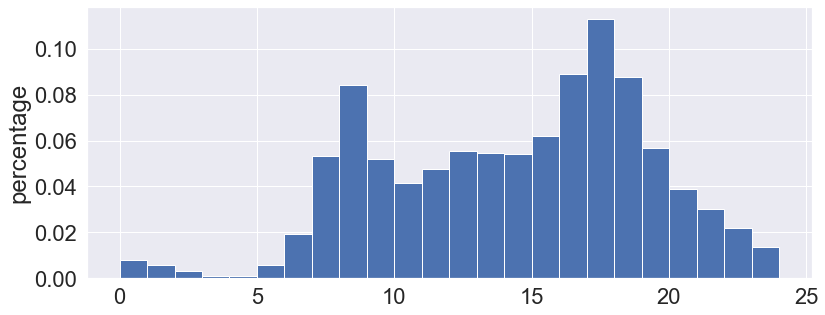

In [33]:
import matplotlib.pyplot as plt

sns.set(font_scale = 2)

# density = percentage
plt.hist(df_bikes['starthour'], density = True, bins = bins)

# resizing figure
plt.gcf().set_size_inches((13,5))

plt.ylabel('starting hour')
# plt.ylabel('count')
# with density:
plt.ylabel('percentage')


from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'bike_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')


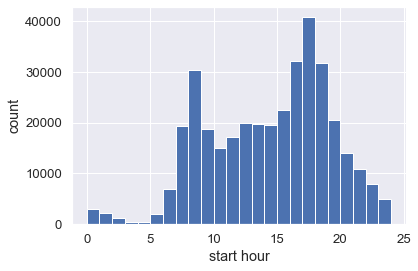

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# makes 
sns.set(font_scale=1.2)

bins = np.linspace(0, 24, 25)
plt.hist(df_bikes['starthour'], bins=bins)
plt.xlabel('start hour')
plt.ylabel('count')

f = 'bike_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')


# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show histogram of `starthour` varies across `dayofweek`:

<img src="https://i.ibb.co/028dKMj/Screenshot-from-2022-10-03-14-15-46.png" width=700>

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`


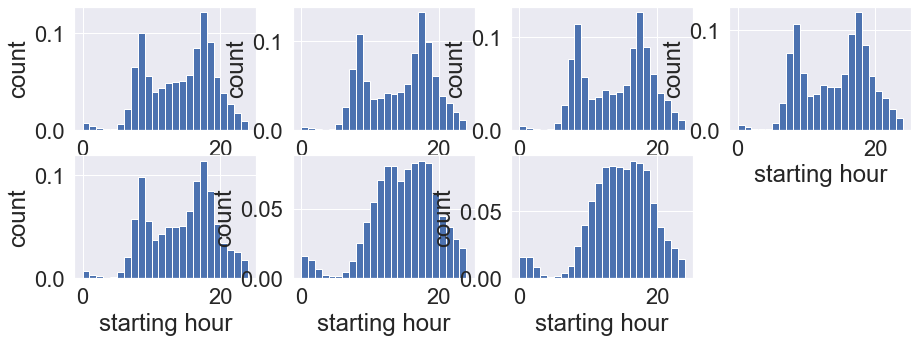

In [35]:
# build one plot, then add loop to make subplot
sns.set(font_scale=2)
bins = np.linspace(0, 24, 25)


# subplot syntax starts at 1
for day_idx in range(0,7):
    subplot_idx = day_idx + 1
    plt.subplot(2, 4, subplot_idx)
    
    # boolean index to get rows corresponding to particular start day
    s_bool = df_bikes['dayofweek'] == day_idx
    df_bikes_day = df_bikes.loc[s_bool, :]
    
    # make a plot
    plt.hist(df_bikes_day['starthour'], density = True, bins=bins)
    plt.xlabel('starting hour')
    plt.ylabel('count')

# resizing the plot
plt.gcf().set_size_inches((15,5))


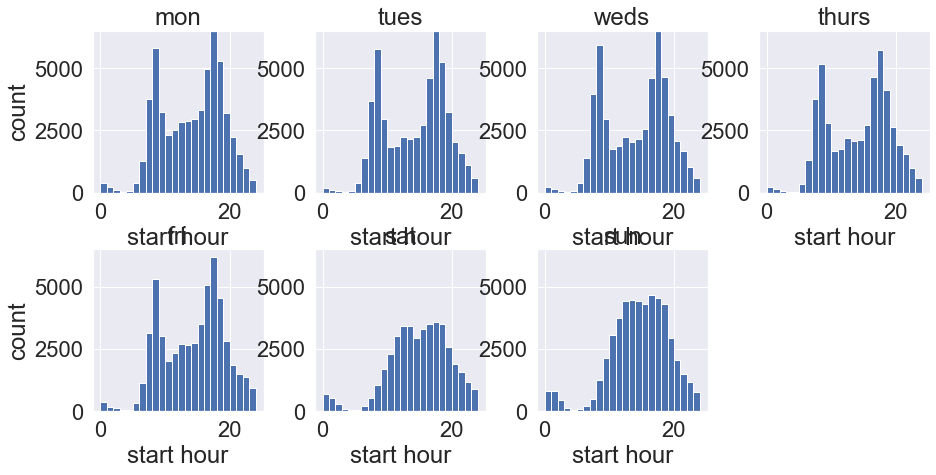

In [36]:
day_list = ['mon', 'tues', 'weds', 'thurs', 'fri', 'sat', 'sun']

for day_of_week in range(7):
    # activate a specific subplot
    plt.subplot(2, 4, day_of_week + 1)
    
    # build df_bikes_day, only includes rows with day_of_week
    bool_day = df_bikes['dayofweek'] == day_of_week
    df_bikes_day = df_bikes.loc[bool_day, :]
    
    # plot histogram
    plt.hist(df_bikes_day['starthour'], bins=bins)
    
    plt.xlabel('start hour')
    if day_of_week in (0, 4):
        plt.ylabel('count')
    
    plt.gca().title.set_text(day_list[day_of_week]) 
    
    plt.ylim(0, 6500)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(15, 7)

# (++) adjust spacing between graphs
plt.subplots_adjust(wspace=.3, hspace=.35)


## In Class Activity B
Build a 1 x 3 subplot array of histograms showing the distance travelled from the following starting stations:
- `Commonwealth Ave at Agganis Way`
- `Kendall T`
- `Ring Rd`

for each plot:
- add title
- label axes

**tip:** build just one of the figures and don't worry about subplot initially, once you've got that settled it'll be easier to build the loop

see what issues come up for you ... any suggestions on displaying this data?  does this graph "lie" to you in any way?


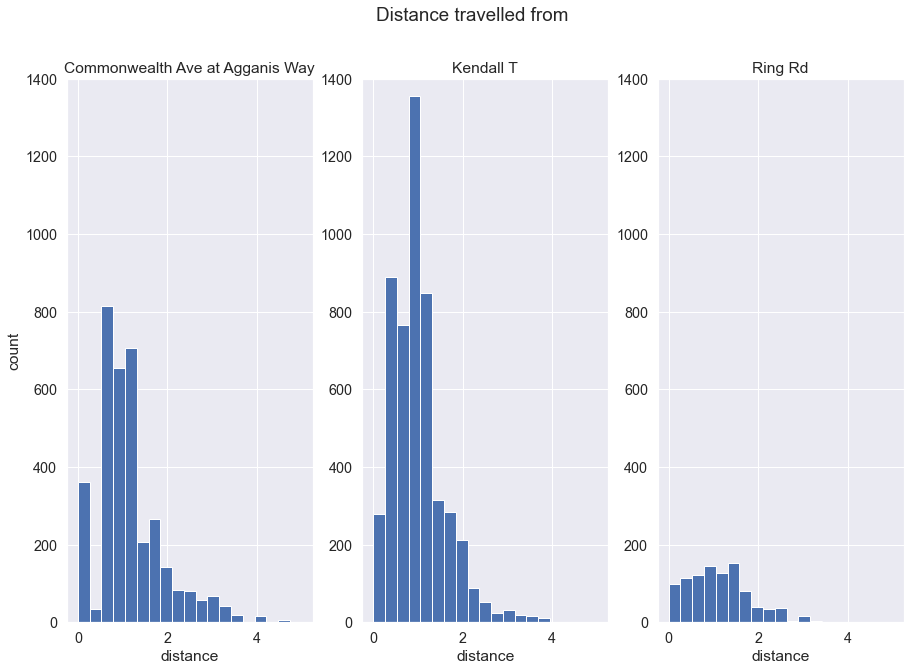

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


station_list = ['Commonwealth Ave at Agganis Way', 'Kendall T', 'Ring Rd']
bins = np.linspace(0, 5, 20)
sns.set(font_scale=1.3)

for station_idx in range(3):
    # find station
    station = station_list[station_idx]
    
    # boolean index to get trips
    bool_station = df_bikes['start station name'] == station
    df_station = df_bikes.loc[bool_station, :]
    
    # plot histogram
    plt.subplot(1, 3, station_idx + 1 )
    plt.hist(df_station['distance'], bins=bins)
    
    # title each subplot
    plt.gca().title.set_text(station)
    
    plt.xlabel('distance')
    plt.ylim(0,1400)
    
    if station_idx == 0:
        plt.ylabel('count')

# titles for subplots
plt.suptitle('Distance travelled from') 
# resizes the whole figure 
plt.gcf().set_size_inches((15, 10))

## Scatter plots

What is the relationship between `tripduration` and `distance` among all bikes leaving:
1. `Boylston St at Massachusetts Ave`
1. `Charles Circle - Charles St at Cambridge St`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale
- `plt.xlim()` / `plt.ylim()` set the limits of the axis
    - example: `plt.xlim(0, 10)` ensures:
        - leftmost points in graph are at x=0
        - rightmost points in graph are at x=10


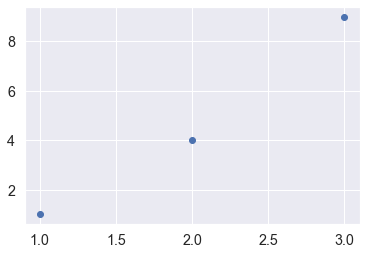

In [38]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
plt.scatter(x, y)


NameError: name 'df_bikes_boyl' is not defined

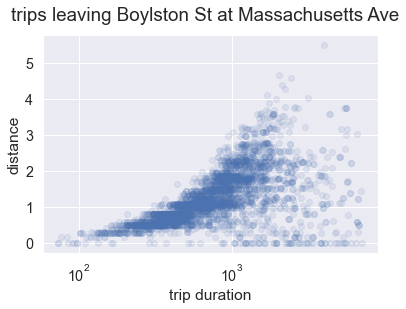

In [41]:
# select only rows corresponding to given start station
bool_boyl = df_bikes['start station name'] == 'Boylston St at Massachusetts Ave'
df_bikes_boyl = df_bikes.loc[bool_boyl, :]

# scatter
# alpha = transparecy
plt.scatter(df_bikes_boyl['tripduration'], df_bikes_boyl['distance'], alpha = 0.1)


# label
plt.xlabel('trip duration')
plt.ylabel('distance')

plt.xscale('log')
plt.suptitle('trips leaving Boylston St at Massachusetts Ave');



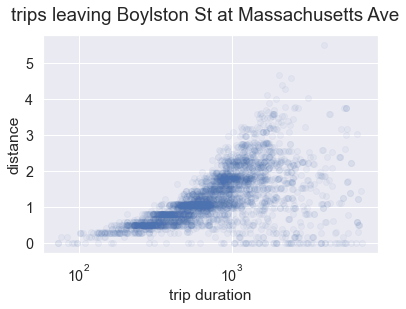

In [42]:
# select only rows corresponding to given start station
bool_boyl = df_bikes['start station name'] == 'Boylston St at Massachusetts Ave'
df_bikes_boyl = df_bikes.loc[bool_boyl, :]

# scatter
plt.scatter(df_bikes_boyl['tripduration'],
            df_bikes_boyl['distance'], alpha=.05)

# label
plt.xlabel('trip duration')
plt.ylabel('distance')
plt.xscale('log')
plt.suptitle('trips leaving Boylston St at Massachusetts Ave');


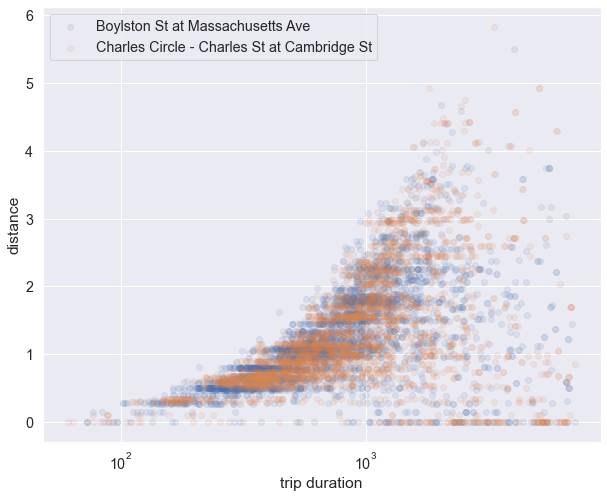

In [43]:
station_list = ['Boylston St at Massachusetts Ave', 
                'Charles Circle - Charles St at Cambridge St']

for station in station_list:
    # boolean index: only rows with given start station
    bool_station = df_bikes['start station name'] == station
    df_bikes_station = df_bikes.loc[bool_station, :]

    # scatter
    plt.scatter(df_bikes_station['tripduration'],
                df_bikes_station['distance'], alpha=.1, label=station)
    
plt.legend()
plt.xlabel('trip duration')
plt.ylabel('distance')
plt.xscale('log')
plt.gcf().set_size_inches(10, 8)
# plt.suptitle('trips leaving Boylston St at Massachusetts Ave');


# Line Plots

What was the mean `tripduration` on every day in the dataset?

- `groupby`
- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- `set_yscale('log')`
- label & legend


In [44]:
df_bikes['startday'].unique()


array(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
       '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
       '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
       '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
       '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
       '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
       '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
       '2019-09-29', '2019-09-30'], dtype=object)

In [45]:
mean_tripduration_by_startday = df_bikes.groupby('startday').mean()['tripduration']
mean_tripduration_by_startday


startday
2019-09-01    1411.420551
2019-09-02    1197.128659
2019-09-03     918.123246
2019-09-04     858.052998
2019-09-05     876.049662
2019-09-06     901.320680
2019-09-07    1121.324338
2019-09-08    1184.459887
2019-09-09     883.270101
2019-09-10     845.662509
2019-09-11     854.394775
2019-09-12     775.301269
2019-09-13     907.278398
2019-09-14    1059.806730
2019-09-15    1182.501944
2019-09-16     861.223461
2019-09-17     854.166218
2019-09-18     826.852744
2019-09-19     853.481745
2019-09-20     952.189161
2019-09-21    1226.532090
2019-09-22    1183.366622
2019-09-23     850.018818
2019-09-24     836.248543
2019-09-25     810.836188
2019-09-26     804.439707
2019-09-27     901.985303
2019-09-28    1244.958820
2019-09-29    1166.008411
2019-09-30     807.095990
Name: tripduration, dtype: float64

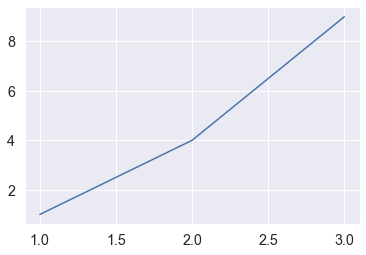

In [46]:
# simple plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)


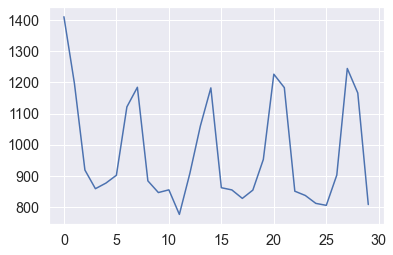

In [47]:
plt.plot(mean_tripduration_by_startday.values)

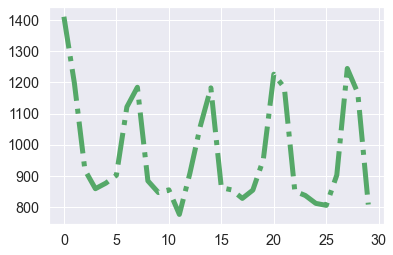

In [48]:
# linestyle ':' dotted, '--' dashed, '-' solid
startday = range(mean_tripduration_by_startday.size)
plt.plot(startday, mean_tripduration_by_startday,
         color='g', linewidth=5, linestyle='-.')


## In class activity C (tight on time, but hopefully!)
Use any graphing method you'd like to answer:

1. Do folks travelling longer distances go faster on `2019-09-30`?
2. (++) Does the relationship hold up on every day of the week? 
    - (subplots)

You have `tripduration` and `distance` ... you can compute `speed` as:
```python
df_bikes['speed'] = df_bikes['distance'] / df_bikes['tripduration']`
```


In [ ]:
# speed
df_bikes['speed'] = df_bikes['distance'] / df_bikes['tripduration']


# boolean index: only rows with start days
bool_day = df_bikes['startday'] == '2019-09-30'
df_bikes_day = df_bikes.loc[bool_day, :]

# scatter
plt.scatter(df_bikes_day['distance'],
            df_bikes_day['speed'], alpha=.1, label='2019-09-30')

# label
plt.legend()
plt.xlabel('distance')
plt.ylabel('speed')
plt.title('2019-09-30')
plt.gcf().set_size_inches(15, 10)